## EDA and Exploratory Synthetic Feature Engineering 

In [2]:
#!pip install featuretools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft

In [25]:
df = pd.read_csv('news_score.csv')
df['ID'] = df.index
df.head()
df.columns

Index(['author', 'contents', 'description', 'publisher', 'source_url', 'title',
       'date', 'time', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'Average', 'Volatility', 'SD',
       'publisherLabel', 'Mark', 'publisher_L', 'author_L', 'score_sentiment',
       'magnitude_sentiment', 'tfidf', 'ID'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7054 entries, 0 to 7053
Data columns (total 26 columns):
author                 7054 non-null object
contents               7054 non-null object
description            7054 non-null object
publisher              7054 non-null object
source_url             7054 non-null object
title                  7054 non-null object
date                   7054 non-null object
time                   7054 non-null object
Open                   7054 non-null float64
High                   7054 non-null float64
Low                    7054 non-null float64
Close                  7054 non-null float64
Volume_(BTC)           7054 non-null float64
Volume_(Currency)      7054 non-null float64
Weighted_Price         7054 non-null float64
Average                7054 non-null float64
Volatility             7054 non-null float64
SD                     7054 non-null float64
publisherLabel         7054 non-null float64
Mark                   7054 non-null float64
p

In [5]:
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,Volatility,SD,publisherLabel,Mark,publisher_L,author_L,score_sentiment,magnitude_sentiment,tfidf,ID
count,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000,7054.000000
mean,8182.139135,8190.604925,8173.207231,8182.071572,25.751414,199728.969814,8181.904584,10701.182909,293362.833360,1411.442590,615.735753,-0.175787,1.412815,0.465126,0.053884,0.375801,0.407626,3526.500000
std,682.239671,678.133716,686.505293,682.132607,16.902330,110347.430735,682.283876,894.026932,116731.998826,561.627091,378.364278,0.529577,1.579945,1.260539,0.481763,0.273717,0.186565,2036.458732
min,6806.927451,6826.417535,6786.712438,6807.273597,9.265880,74305.946820,6806.651598,9786.788157,180619.004500,869.003591,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000,0.157630,0.000000
25%,7905.440896,7917.342931,7892.443951,7905.416028,13.935292,121295.129200,7904.972491,10090.346930,192710.683500,927.179708,202.000000,0.000000,0.000000,-1.000000,-0.300000,0.200000,0.281280,1763.250000
50%,8310.115639,8313.456646,8306.793611,8310.097187,18.984345,154043.483800,8310.129580,10130.017600,231620.464900,1114.384481,643.000000,0.000000,2.000000,0.000000,0.000000,0.300000,0.329700,3526.500000
75%,8617.131229,8620.755771,8613.696326,8617.348722,35.615632,297975.902000,8617.210484,11592.976650,437801.267600,2106.372331,967.000000,0.000000,3.000000,1.000000,0.400000,0.600000,0.491838,5289.750000
max,9435.828417,9441.771257,9429.061993,9435.448514,63.421083,432929.362400,9435.411315,12603.493540,452638.412200,2177.757576,1186.000000,1.000000,3.000000,3.000000,0.900000,0.900000,1.633640,7053.000000


## Visulization

Text(0, 0.5, 'Frequency')

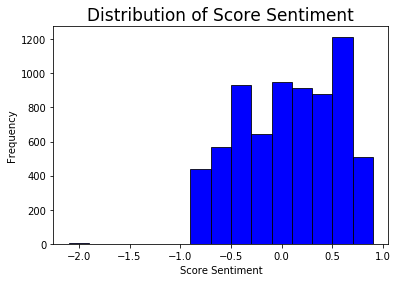

In [6]:
plt.hist(df['score_sentiment'], bins = np.arange(-2.1, 1, 0.2), color = 'blue', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of Score Sentiment', fontsize = 17)
plt.xlabel('Score Sentiment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

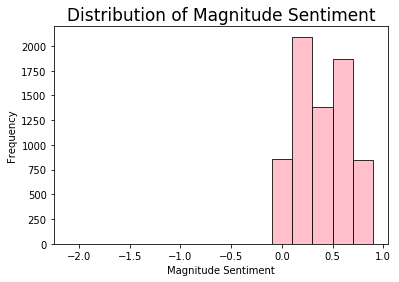

In [7]:
plt.hist(df['magnitude_sentiment'], bins = np.arange(-2.1, 1, 0.2), color = 'pink', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of Magnitude Sentiment', fontsize = 17)
plt.xlabel('Magnitude Sentiment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

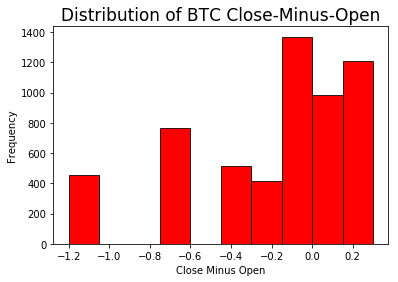

In [8]:
plt.hist(df['Close'] - df['Open'], bins = np.arange(-1.2, 0.4, 0.15), color = 'red', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of BTC Close-Minus-Open', fontsize = 17)
plt.xlabel('Close Minus Open')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

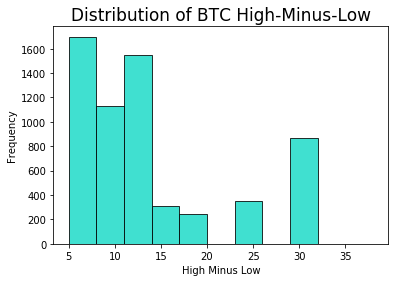

In [9]:
plt.hist(df['High'] - df['Low'], bins = np.arange(5, 40, 3), color = 'turquoise', edgecolor = 'black', linewidth = 0.8)
plt.title('Distribution of BTC High-Minus-Low', fontsize = 17)
plt.xlabel('High Minus Low')
plt.ylabel('Frequency')

In [10]:
#Apply DFS Techniques

In [14]:
es = ft.EntitySet(id = 'df')
z = dict()
dup_count = 0
for x in df['title']:
    if x in z:
        dup_count += 1
    else:
        z[x] = 1
print("out of " + str(len(df)) + " articles we see that there are " + str(dup_count) + " duplications.")

out of 7054 articles we see that there are 2981 duplications.


In [34]:
es = es.entity_from_dataframe(entity_id = 'df', dataframe = df, 
                              index = 'index', time_index = 'date')
es
es["df"].variables

[<Variable: index (dtype = index)>,
 <Variable: author (dtype = categorical)>,
 <Variable: contents (dtype = text)>,
 <Variable: description (dtype = text)>,
 <Variable: publisher (dtype = categorical)>,
 <Variable: source_url (dtype = text)>,
 <Variable: title (dtype = text)>,
 <Variable: date (dtype: datetime_time_index, format: None)>,
 <Variable: time (dtype: datetime, format: None)>,
 <Variable: Open (dtype = numeric)>,
 <Variable: High (dtype = numeric)>,
 <Variable: Low (dtype = numeric)>,
 <Variable: Close (dtype = numeric)>,
 <Variable: Volume_(BTC) (dtype = numeric)>,
 <Variable: Volume_(Currency) (dtype = numeric)>,
 <Variable: Weighted_Price (dtype = numeric)>,
 <Variable: Average (dtype = numeric)>,
 <Variable: Volatility (dtype = numeric)>,
 <Variable: SD (dtype = numeric)>,
 <Variable: publisherLabel (dtype = numeric)>,
 <Variable: Mark (dtype = numeric)>,
 <Variable: publisher_L (dtype = numeric)>,
 <Variable: author_L (dtype = numeric)>,
 <Variable: score_sentiment (dt

In [35]:
# TODO: normalization and deep synthetic feature extraction
features, feature_names = ft.dfs(entityset=es, target_entity='df',
                                 agg_primitives=["mean", "max", "min", "std", "skew"],
                                 trans_primitives=['multiply_numeric', 'day', 'weekday', 'month'], max_depth = 1)

features.head()

,author,publisher,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Average,...,Close * tfidf,author_L * Volume_(Currency),Mark * score_sentiment,score_sentiment * Volume_(Currency),DAY(date),DAY(time),WEEKDAY(date),WEEKDAY(time),MONTH(date),MONTH(time)
index,,,,,,,,,,,,,,,,,,,,,
0,Bitcoinist.net,Bitcoinist.com,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,2696.355399,-300510.2071,0.0,120204.084643,2,17,4,6,2,3
1,Michelle Fox,CNBC,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,4261.686084,0.0000,0.0,30051.021011,2,17,4,6,2,3
2,Scott Scanlon,Youbrandinc.com,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,2717.724518,-300510.2071,0.0,120204.084643,2,17,4,6,2,3
3,Bruce Kleinman,Hackernoon.com,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,8337.375358,0.0000,0.0,60102.042322,2,17,4,6,2,3
4,Jason Murphy,Crikey.com.au,8547.864403,8562.224306,8533.223049,8547.647486,35.615632,300510.2071,8547.594042,12603.49354,...,2880.215297,0.0000,0.0,240408.169286,2,17,4,6,2,3
